<a href="https://colab.research.google.com/github/dooooing/2023_ESAA/blob/main/1117_%EC%A0%9C%EC%B6%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch9_6~8_pg_591_~_624.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 딥러닝 텐서플로 ch3. 1-3 pg. 50-86

# 03. 케라스(Keras)

## 01. 딥러닝 준비



---


**케라스** API : 고수준의 딥러닝 라이브러리

* GPU 연산을 수행하는 기능을 직접 수행하지 않고 텐서플로, CNTK, Theano, MXNet 등의 백엔드 엔진을 지정하여 사용한다는 차이점

* 목적 : 딥러닝 라이브러리를 쉽고 간결한 코드로 실행할 수 있게 만들어주는 것
  + 장점 : 직관적. 사용자 친화적 설계. 백엔드 엔진 쉽게 변경 가능.
  + 한계점 : 복잡한 구조의 모델 구현과 사용자 정의 훈련을 위해서는 텐서플로의 저수준 API 활용해야한다

### 1-1 주요 용어

#### 1-1-1 하이퍼파라미터(hyper-parameter)

딥러닝에서 말하는 하이퍼파라미터는 파이썬에서 배운 파라미터와는 다른 의미

**하이퍼파라미터** : 사용자가 직접 설정해야 하는 값들 -> 조절하는 행위를 하이퍼파라미터 튜닝

* 사용자가 별도로 설정해주지 않으면 기본값이 지정되어 있어 자동으로 적용

#### 1-1-2 과소적합 vs. 과대적합

>* train set : 머신러닝 모델이 학습할 데이터
>* test set : 정답 레이블이 없는 머신러닝 모델이 예측해야 하는 대상 데이터

* 예측할 데이터가 모델이 학습한 데이터와 다른 분포를 갖거나 / 학습한 데이터가 특정 레이블에 편향된 데이터로 이루어져 있다면 -> 모델이 학습한 후 예측 성능이 현저히 떨어지게 된다

>* 과소적합 : 모델이 충분히 학습되지 않은 경우
>* 과대적합 : 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태
  + 주어진 훈련 데이터에 대한 예측 성능 좋지만, 정작 중요한 예측 데이터에 대한 예측 오차가 발생할 확률 커진다

#### 1-1-3 에포크(epoch)

딥러닝은 데이터셋을 학습하는 과정을 여러 번 반복(iteration)하면서 최적의 모델 가중치를 찾는 과정

* **에포크** : 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프

* 모델이 과소적합되었다 판단 -> epoch 늘려서 다시 학습
* 모델이 빠르게 과대적합 구간으로 진입 -> epoch 줄여서 최적 구간에서 학습을 조기에 종료하는 것

#### 1-1-4 손실함수

손실함수 : 예측 값과 정답 값의 차이 또는 오차 -> 사용자가 정의해야한다

* **이진 분류**
  + 손실함수 : **binary_crossentropy**
  + 출력층의 활성화 함수 : **sigmoid**
* **다중 분류**
  + 손실함수(정답 클래스가 원핫 벡터인 경우) : **categorical_crossentropy**
  + 손실함수(정답 클래스가 레이블 값으로 표현) : **sparse_categorical_crossentropy**
  + 출력층의 활성화 함수 : **softmax**

* 회귀 모델의 경우 평균제곱오차(MSE), 평균절대값오차(MAE), 후버(Huber) 등 사용

KakaoTalk_20230521_232556096.jpg

In [ ]:
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

<function keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

#### 1-1-5 경사하강법(gradient descent)

**경사하강법** : 딥러닝 모델을 훈련할 때, 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법

* 딥러닝 훈련 프로세스에서 경사하강법 알고리즘을 적용하여 손실함수 값을 최소로 만드는 가중치를 찾을 수 있따

*  단순 선형회귀 수식 y = wx + b 주어졌을 때, 손실함수를 최소로 하는 w와 b를 구하는 과정을 경사하강법으로 구현

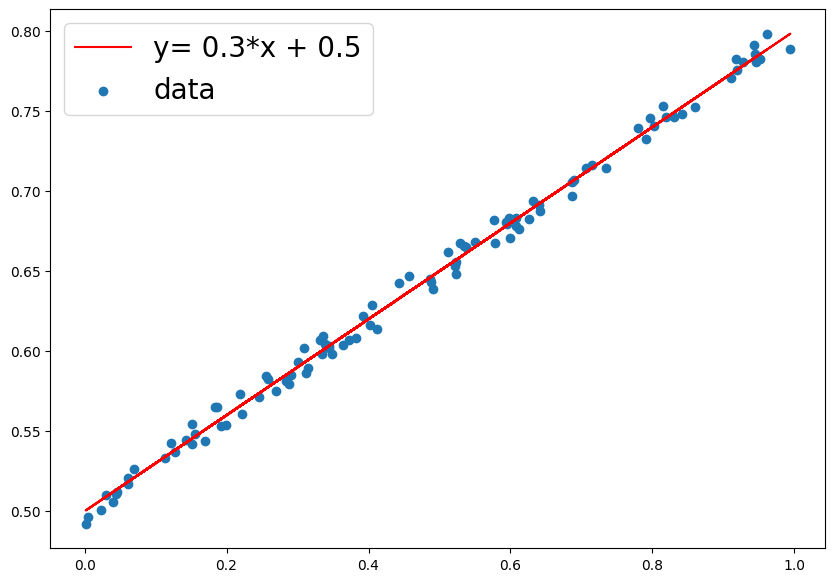

w:0.3, b:0.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기

def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
  x=np.random.rand(size)
  y=w*x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size = y.shape)
  yy= y+noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y, color='r', label=f'y= {w}*x + {b}')
  plt.scatter(x, yy, label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w}, b:{b}')
  return x, yy

x,y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

* w, b에 대한 그래디언트를 구하는 부분만 구현
  + 그래디언트는 손실함수를 w,b에 대한 각각의 편미분 값을 구한 뒤 학습률 계수를 곱하여 이전의 w,b로부터 차감

In [ ]:
# 최대 반복 횟수
num_epoch=1000

# 학습률
learning_rate=0.005

# 에러 기록
errors=[]

# random 한 값으로 w, b 초기화
w=np.random.uniform(low=0.0, high=1.0)
b=np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # 가설 정의
  y_hat=w*x+b

  # 손실 함수 정의
  error=0.5*((y_hat-y)**2).sum()
  if error<0.005:             # 오차가 0.005 이내로 수렴하면 반복문 종료
    break
  # 그라디언트 미분 계산      # 매 epoch마다 w,b에 대한 가중치 업데이트
  w=w-learning_rate*((y_hat-y)*x).sum()
  b=b-learning_rate*(y_hat-y).sum()

  errors.append(error)

  if epoch%5==0:
    print('{0:2}w={1:.5f}, b={2:.5f} error ={3:.5f}'.format(epoch, w, b, error))

print('----'*15)
print('{0:2}w={1:.1f}, b={2:.1f} error ={3:.5f}'.format(epoch, w, b, error))

 0w=0.28743, b=0.60502 error =3.26686
 5w=0.25616, b=0.52249 error =0.01018
10w=0.26241, b=0.51857 error =0.00769
15w=0.26802, b=0.51578 error =0.00604
------------------------------------------------------------
20w=0.3, b=0.5 error =0.00483


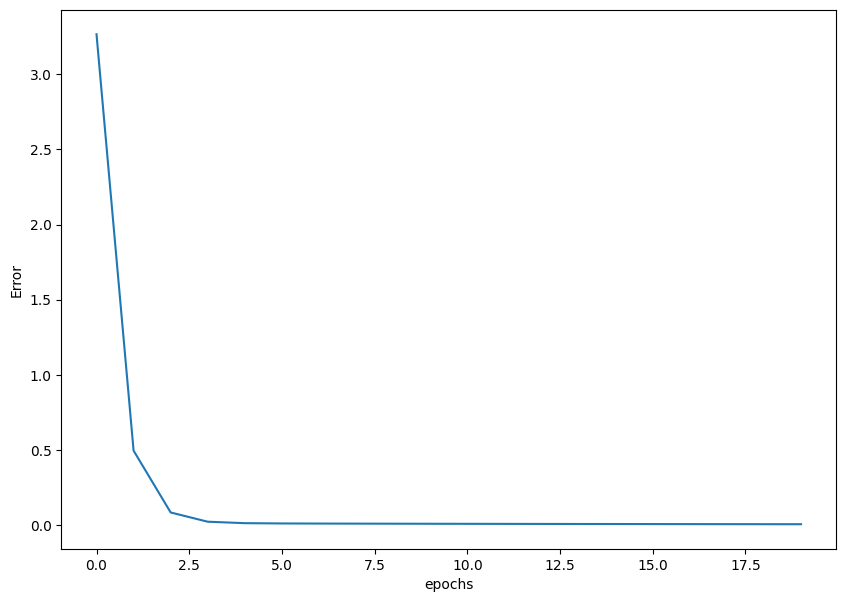

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel("epochs")
plt.ylabel('Error')
plt.show()

=> 매번 실행할 때마다 수렴하는 속도는 차이가 있지만, 결국 목표하는 오차 범위 안으로 수렴해 반복문 종료. 설정했던 w,b 계수와 비슷한 값임.

### 1-2 딥러닝 프로세스

* 딥러닝 모델 구축 및 훈련 프로세스

데이터 로드 -> 데이터 전처리 -> 데이터 분할 -> 모델 생성&컴파일 -> 훈련 -> 검증 -> 예측

#### 1-2-1 데이터 전처리

: 데이터를 가공하는 단계

* 배열의 차원을 변경하거나 스케일을 조정할 수 있다

#### 1-2-2 모델 생성

: 모델의 구조를 정의하고 생성하는 단계

* 순차적인 구조의 모델은 **Sequential** API
* 다중 입력 및 출력을 가지고 복잡한 구조를 갖는 모델은 **Functional** API 혹은 **Model Subclassing**

#### 1-2-3 모델 컴파일

: 생성된 모델 훈련에 사용할 손실함수(loss), 옵티마이저(optimizer), 평가지표(metrics) 등을 정의

* 모델 인스턴스에 **compile()** 메소드 적용해 여러 가지 속성 값 설정

#### 1-2-4 모델 훈련

: 모델을 훈련하는 단계

* **fit()** 함수에 모델 훈련에 필요한 정보를 매개변수로 전달
  + 훈련 데이터셋, 검증 데이터셋, epoch, 배치 크기 및 콜백 함수 등 지정

#### 1-2-5 모델 검증

: 훈련이 완료된 모델을 검증하는 단계

* 모델을 훈련할 때 사용하지 않은 검증 데이터셋을 모델에 입력하고 모델의 예측 값을 정답과 비교하여 평가지표 계산
* 검증 결과를 바탕으로 다시 수정, 재평가하는 단계 통해 목표 성능에 도달할 때까지 과정 계속 반복

#### 1-2-6 모델 예측

: 테스트셋에 대하여 모델이 예측하고 그 결과 반환

## 02. 단순 신경망 훈련



---



### 2-1 선형회귀

텐서플로 케라스를 활용하여 단순선형회귀 모델 직접 만들고 딥러닝 학습

* y = wx + b
  + w : 가중치(weight)
  + b : 편향(bias)

### 2-2 뉴런

뉴런 : 인공 신경망 모델을 구성하는 하나의 신경. =노드.

* 신경망은 여러 개의 레이어(layer)를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성
* 뉴런의 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치 업데이트
  + 역전파 : 손실함수를 미분한 결과인 그래디언트를 출력층에서 입력층 순으로 역으로 계산해 저장

### 2-3 Dense 레이어

**Dense 레이어** : 심층 신경망 모델을 구성하는 가장 기본 레이어. = 완전 연결층(Fully Connected Layer)

* Dense 레이어로 구성된 모델 - 각 레이어는 1개 이상의 뉴런으로 구성
  + 노드의 개수를 Dense 레이어의 첫 번째 위치 인자로 지정
  + activation 매개변수에 활성화 함수 지정하여 적용

In [ ]:
import tensorflow as tf

# 10개의 노드로 이루어진 dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

### 2-4 데이터셋 만들기



In [ ]:
# 샘플 데이터셋 생성
x=np.arange(1,6)

#y=3x+2
y=3*x+2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


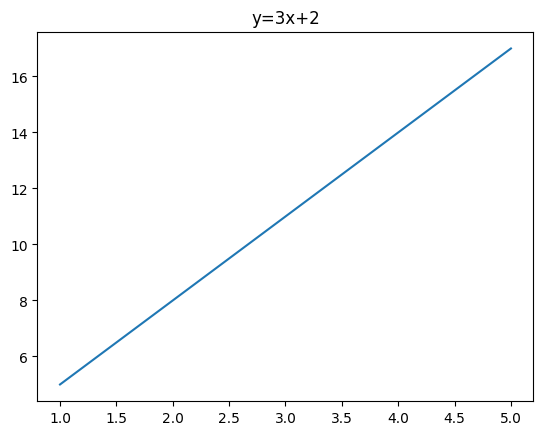

In [ ]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y=3x+2')
plt.show()

### 2-5 Sequential API

**Sequential API** : 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식.

* 입력 레이어부터 출력 레이어까지 순서를 갖는다
* 2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조를 만들 수 없다
* 쌓고자 하는 레이어의 개수는 제한이 없다



#### 2-5-1 모델 구조

1. 파이썬 리스트 형태로 여러 개의 층을 입력

In [ ]:
import tensorflow as tf

#리스트형
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

2. add 함수로 레이어 추가로 Sequential 클래스 객체 만든 후, 층을 추가

In [ ]:
#add 함수로 레이어 추가
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

#### 2-5-2 입력 데이터 형태

* 반드시 첫 번째 층은 **input_shape** 매개변수 지정해야 한다
  + 주입할 데이터셋의 shape을 투플 혹은 리스트로 지정
  + shape에서 각 행은 샘플 데이터. 열은 입력 변수(-> input_shape)

In [ ]:
import tensorflow as tf
model=tf.keras.Sequential([
    #입력 데이터의 shape=(150, 4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

#### 2-5-3 단순선형회귀 모델 정의

단순선형회귀 모델을 만들기 위해서 1개의 뉴런을 가지는 Dense 레이어 한 개 사용. 여기서 1개의 뉴런은 w, b를 매개변수로 갖는다

* Dense 레이어는 use_bias=True가 기본 설정되어 상수항 b가 추가된다

In [ ]:
# 단순선형회귀 모델 생성
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # x 값을 나타내는 입력 변수 1개만 존재 -> input_shape=[1]로 지정
])

### 2-6 모델 요약

모델 요약 확인 => **model.summary()**

* 모델의 구조 확인 가능. 층별 노드의 개수 표기. 훈련 시 업데이트할 파라미터의 개수 표기
  + Total params : 모델 내부에 존재하는 모든 파라미터의 합계
  + Trainable params : 모델 훈련 시 업데이트할 파라미터의 총 개수
  + Non-trainable params : 훈련 시 업데이트하지 않을 파라미터의 총 개수

* 단순선형회귀 모델에서는 업데이트 파라미터가 가중치 w와 편향 b 두개

In [ ]:
# 모델 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### 2-7 컴파일

컴파일 단계에서는 모델의 훈련 과정에서 적용할 옵티마이저, 손실함수, 그리고 평가지표 등을 정의

 -> 클래스 인스턴스, 함수 혹은 사전 정의된 문자열 3가지 방법으로 지정 가능

In [ ]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

In [ ]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [ ]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()])

In [ ]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])     # sgd는 확률적 경사하강법(Stochastic Gradient Descent)

### 2-8 훈련

모델이 훈련한다 = 가중치 텐서를 업데이트하는 과정

* fit() 메소드에 훈련용 데이터셋의 입력(x)와 정답에 해당하는 출력(y), 반복 훈련할 epoch 수 지정
  + 매 epoch 끝날 때마다 훈련 데이터셋에 대한 손실과 평가지표 출력
  + verbose = 0 옵션 지정 시 훈련 중간 과정 출력x
  + 검증 데이터셋(validation_data) 옵션 지정 시 검증셋에 대한 손실과 평가지표도 함께 출력

In [ ]:
# 훈련
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 57.6305 - mae: 7.1869
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 33.7333 - mae: 5.5421
Epoch 3/5
1/1 [==============================] - 0s 17ms/step - loss: 19.8062 - mae: 4.2862
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 11.6892 - mae: 3.3273
Epoch 5/5
1/1 [==============================] - 0s 19ms/step - loss: 6.9580 - mae: 2.5952


=> 모델의 예측 오차 점점 줄어드는 것. 모델이 잘 학습되고 있음

=> 하지만 반복 훈련 횟수 충분하지 않아 학습이 덜 되었다 -> 과소적합 상태

In [ ]:
# 단순 선형회귀 모델 생성
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history=model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 1s 1s/step - loss: 68.9864 - mae: 7.8368
Epoch 2/1200
1/1 [==============================] - 0s 16ms/step - loss: 40.3395 - mae: 6.0360
Epoch 3/1200
1/1 [==============================] - 0s 14ms/step - loss: 23.6445 - mae: 4.6611
Epoch 4/1200
1/1 [==============================] - 0s 14ms/step - loss: 13.9146 - mae: 3.6113
Epoch 5/1200
1/1 [==============================] - 0s 19ms/step - loss: 8.2435 - mae: 2.8098
Epoch 6/1200
1/1 [==============================] - 0s 24ms/step - loss: 4.9378 - mae: 2.1977
Epoch 7/1200
1/1 [==============================] - 0s 12ms/step - loss: 3.0105 - mae: 1.7303
Epoch 8/1200
1/1 [==============================] - 0s 21ms/step - loss: 1.8865 - mae: 1.3733
Epoch 9/1200
1/1 [==============================] - 0s 20ms/step - loss: 1.2306 - mae: 1.1006
Epoch 10/1200
1/1 [==============================] - 0s 16ms/step - loss: 0.8474 - mae: 0.8923
Epoch 11/1200
1/1 [==============================] - 0s 5

=> 충분한 epoch 동안 훈련한 후 mse, mae 모두 개선

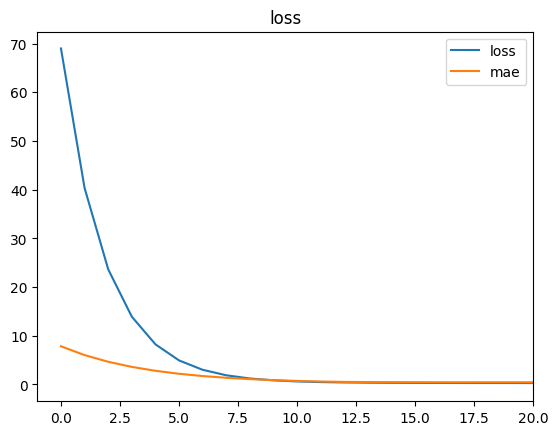

In [ ]:
import matplotlib.pyplot as plt

# 20 epoch까지 loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('loss')
plt.legend()
plt.show()

=> 모델 훈련 초기 단계에는 학습이 매우 빠른 속도로 진행되다가 일정 epoch 이후에는 학습 속도가 느려지는 패턴 보임

### 2-9 검증

모델 인스턴스의 **evaluate()** 메소드로 모델의 성능 검증

* 일반적으로 사전에 별도의 검증 데이터셋 준비하여 모델 성능 평가 -> 교차 검증
  + 교차 검증 방법에는 홀드아웃(Hold-out), K-Fold 교차 검증 등

In [ ]:
# 검증
model.evaluate(x, y)

1/1 [==============================] - 0s 194ms/step - loss: 9.8922e-05 - mae: 0.0085


[9.892238449538127e-05, 0.008536910638213158]

### 2-10 예측

훈련 완료된 모델 인스턴스의 **predict()** 메소드에 새로운 입력 데이터 넣어 주면 모델의 예측 값 얻을 수 있다

In [ ]:
# 예측
model.predict([10])

1/1 [==============================] - 0s 137ms/step


array([[32.04126]], dtype=float32)

## 03. 심층 신경망으로 이미지 분류



---


이미지 분류를 위해 단층이 아닌 더 깊은 층을 쌓아 깊이가 있는 딥러닝 모델 생성

### 3-1 케라스 내장 데이터셋 로드

* 케라스는 샘플 데이터셋 제공 tensorflow.keras.datasets
  + boston_housing : 보스톤 주택 가격 데이터셋(회귀)
  + cifar10 : CIFAR10 이미지 분류 데이터셋(분류)
  + cifar100 : CIFAR100 이미지 분류 데이터셋(분류)
  + mnist : mnist 손글씨 데이터셋(분류)
  + fashion_mnist : 의류 데이터셋(분류)
  + imdb : IMDb 영화 데이터셋(분류)
  + reuters : Reuters 뉴스 토픽(분류)

* 데이터 불러오기 위해 load_data() 메소드 사용
  + 훈련 데이터셋과 검증 데이터셋 구분하여 제공

In [ ]:
import tensorflow as tf

# 케라스 내장 데이터셋에서 mnist 데이터셋 로드
mnist=tf.keras.datasets.mnist

In [ ]:
# load data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print("train set: ", x_train.shape, y_train.shape)
print("test set: ", x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


=> 훈련 셋에는 60000개의 데이터. 검증 셋에는 10000개 데이터 저장되어 있다

=> shape의 첫 번째는 데이터셋의 크기, 나머지는 순서대로 이미지의 세로, 가로의 픽셀 크기

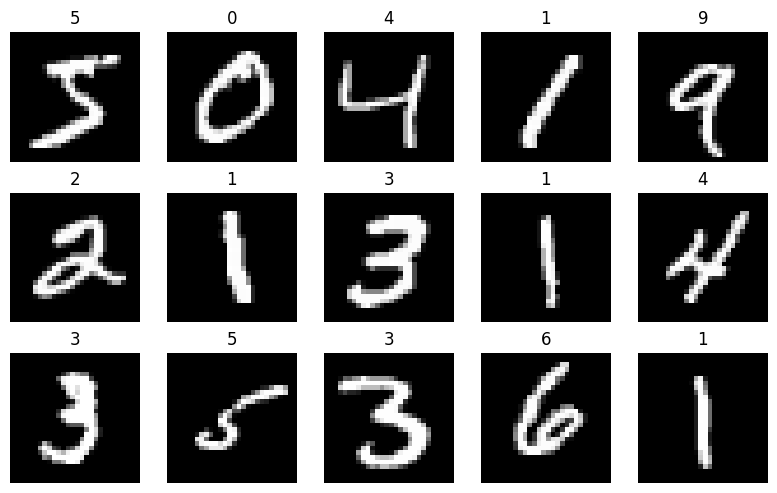

In [ ]:
#데이터 시각화
import matplotlib.pyplot as plt

#canvas 생성
fig, axes=plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax=axes[i//5, i%5]
  #imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

* mnist 데이터셋 : 사람의 필기체로 쓰인 0~9까지의 숫자들로 이루어진 데이터셋. 총 10개의 정답 레이블로 구성

### 3-2 데이터 전처리

이미지 데이터에 대하여 **정규화**를 통해 데이터의 범위 조절

In [ ]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15] #배열의 각 원소는 이미지를 구성하는 하나의 픽셀 값과 일대일 대칭

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

=> 0~255 사이의 값. 데이터의 범위를 0 ~ 1로 정규화하기 위해 255로 나눈다

In [ ]:
# 픽셀 값의 최소/최대값 확인
print(f"정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}") # 0~255

# 데이터 정규화
x_train = x_train/x_train.max()

# 정규화 후 최소/최대값 확인
print(f"정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}") # 0~1

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [ ]:
# test set에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [ ]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

* 정규화하는 이유 : 비정규화된 입력 데이터를 가질 때보다 더 빨리 수렴. 국소 최적에 빠지는 현상도 방지

### 3-3 Flatten 레이어

정규화를 하더라도 개별 데이터 값의 범위는 축소되지만, 원본 배열의 형태는 그대로 유지된다

* 2차원 입력은 Dense 레이어에 입력값으로 넣을 수 없다 -> 반드시 입력값으로 1차원 배열 들어가야 한다

In [ ]:
print(f'변경 전 shape: {x_train.shape}')
print(f'1D로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경 전 shape: (60000, 28, 28)
1D로 shape 변경 후: (60000, 784)


* **Flatten 레이어** 사용하여 다차원 데이터를 1차원으로 펼쳐

In [ ]:
print(f'변경 전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


### 3-4 활성화 함수

**활성화 함수** : 입력을 비선형 출력으로 변환해주는 함수. 선형관계를 나타내는 함수에 비선형성을 추가하는 방법으로 표현

* 시그모이드(Sigmoid), 하이퍼볼릭 탄젠트(Hyperbolic Tangent 혹은 tanh), ReLU(Rectified Unit), Leaky ReLU 등

* **activation** 매개변수에 활성화 함수 문자열 대입

In [ ]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

* 별도의 층처럼 적용할 수도 - Dense 레이어 다음에 배치 정규화를 적용한 후 활성화 함수를 적용하고자 할 때 많이 사용

In [ ]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

### 3-5 입력과 출력

* 딥러닝 모델 만들 때 입력 데이터의 형태를 나타내는 input_shape 매개변수 지정하는 것 일반적

* 가장 마지막 레이어인 출력층의 노드 개수는 반드시 분류해야 할 클래스의 개수와 동일

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # 노드=10개(클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'),
])

* 모델의 깊이(레이어의 개수)와 너비(각 레이어를 구성하는 노드의 개수)에 대한 정답은 없다 -> 여러 가지 시도를 통해서 최적의 모델 형태 찾을 필요가 있다

>* 다중 분류 문제에서는 **softmax** 활성화 함수 사용해야 한다
>* 이진 분류 모델에서는 **sigmoid** 활성화 함수 적용해야 한다
  + 이진 분류 모델이더라도 출력 레이어의 클래스를 원핫 인코딩으로 변환하여 노드 개수가 2개인 경우에는 softmax 함수 사용

In [ ]:
# 출력층 노드 = 1 인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')
# 출력층 노드 = 2 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

### 3-6 손실함수

분류 모델의 손실함수는 모델의 출력층에 따라 설정

KakaoTalk_20230522_111446977.jpg

* 이진 분류기 생성 시, 출력층의 노드 개수가 1 -> activation='sigmoid'. 손실함수는 'binary_crossentropy'

In [ ]:
# 이진 분류 (출력 노드 개수 =1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

* 출력층의 노드 개수가 2개 이상인 경우 -> activation='softmax'. 손실함수는 'categorical_crossentropy' 혹은 'sparse_categorical_crossentropy'
  + 출력 데이터(y)가 원핫 벡터인 경우 'categorical_crossentropy' 지정

In [ ]:
# y가 원핫 벡터인 경우
# [0.. 0.. 0.. 1.. 0..]
model.compile(loss='categorical_crossentropy')
# y가 원핫 벡터가 아닌 경우 -> mnist의 경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

### 3-7 옵티마이저

**옵티마이저(optimizer)** : 손실을 낮추기 위해서, 신경망의 가중치와 학습률와 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법

* 일반적으로 많이 사용되는 알고리즘은 **Adam**

* 케라스에서 지원하는 옵티마이저 목록
  + SGD
  + Adam
  + Adagrad
  + Nadam
  + RMSprop
  + Adadelta
  + Adamax
  + Ftrl

* 옵티마이저는 클래스 인스턴스로 지정하거나 문자열로 지정 가능
  + 문자열로 지정할 때는 클래스 이름을 소문자로 표기
  + 클래스 인스턴스로 지정할 때는 하이퍼파라미터 직접 설정 가능

In [ ]:
# 클래스 인스턴스로 지정
adam=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer=['adam'])

### 3-8 평가지표

분류 모델에 대한 **평가지표(metrics)**는 정확도 'accuracy' 가장 많이 사용.

* 'auc', 'precision', 'recall' 등의 지표도 많이 사용
* 클래스 인스턴스로 지정하거나 문자열로 지정 가능

In [ ]:
# 클래스 인스턴스로 지정
acc=tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [ ]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 3-9 훈련

모델을 훈련할 때 검증 셋을 추가 지정하면, 매 epoch마다 훈련 손실과 검증 손실, 각 셋에 대한 평가지표 나란히 출력

-> validation_data 매개변수에 투플 형식의 검증 셋 지정해주면 된다

In [ ]:
# 훈련
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2275 - accuracy: 0.9325 - val_loss: 0.1203 - val_accuracy: 0.9653
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0934 - accuracy: 0.9714 - val_loss: 0.0919 - val_accuracy: 0.9706
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0658 - accuracy: 0.9790 - val_loss: 0.0771 - val_accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0499 - accuracy: 0.9836 - val_loss: 0.0835 - val_accuracy: 0.9749
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0373 - accuracy: 0.9879 - val_loss: 0.0726 - val_accuracy: 0.9803
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0333 - accuracy: 0.9885 - val_loss: 0.0837 - val_accuracy: 0.9773
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0281 - accuracy: 0.9906 - val_loss: 0.0887 - val_ac

### 3-10 평가

훈련이 종료된 뒤 evaluate() 메소드로 모델 성능 검증하고 평가 결과 확인. 검증 셋인 x_test, y_test 함수에 전달

* evaluate() 메소드는 컴파일 단계에서 지정한 손실과 정확도 순서대로 반환

### 3-11 예측

predict() 메소드에 이미지 데이터 넣어주면 모델의 예측 결과 반환

In [ ]:
# 예측
predictions=model.predict(x_test)   # 새로운 데이터셋 준비x

313/313 [==============================] - 1s 2ms/step


* predictions 변수에 모델이 예측한 분류 결과를 넘파이 배열 형태로 저장

In [ ]:
# 예측 결과 출력
predictions[0]

array([2.2798142e-13, 6.6973918e-08, 1.1012889e-08, 2.2986719e-10,
       2.8109530e-06, 1.7693408e-10, 5.7349242e-15, 9.9999636e-01,
       3.9211495e-11, 5.7688476e-07], dtype=float32)

* softmax 활성화 함수 거친 출력 값은 개별 클래스에 대한 분류 확률값
  + 가장 높은 확률값을 가진 클래스가 최종 예측된 클래스

In [ ]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


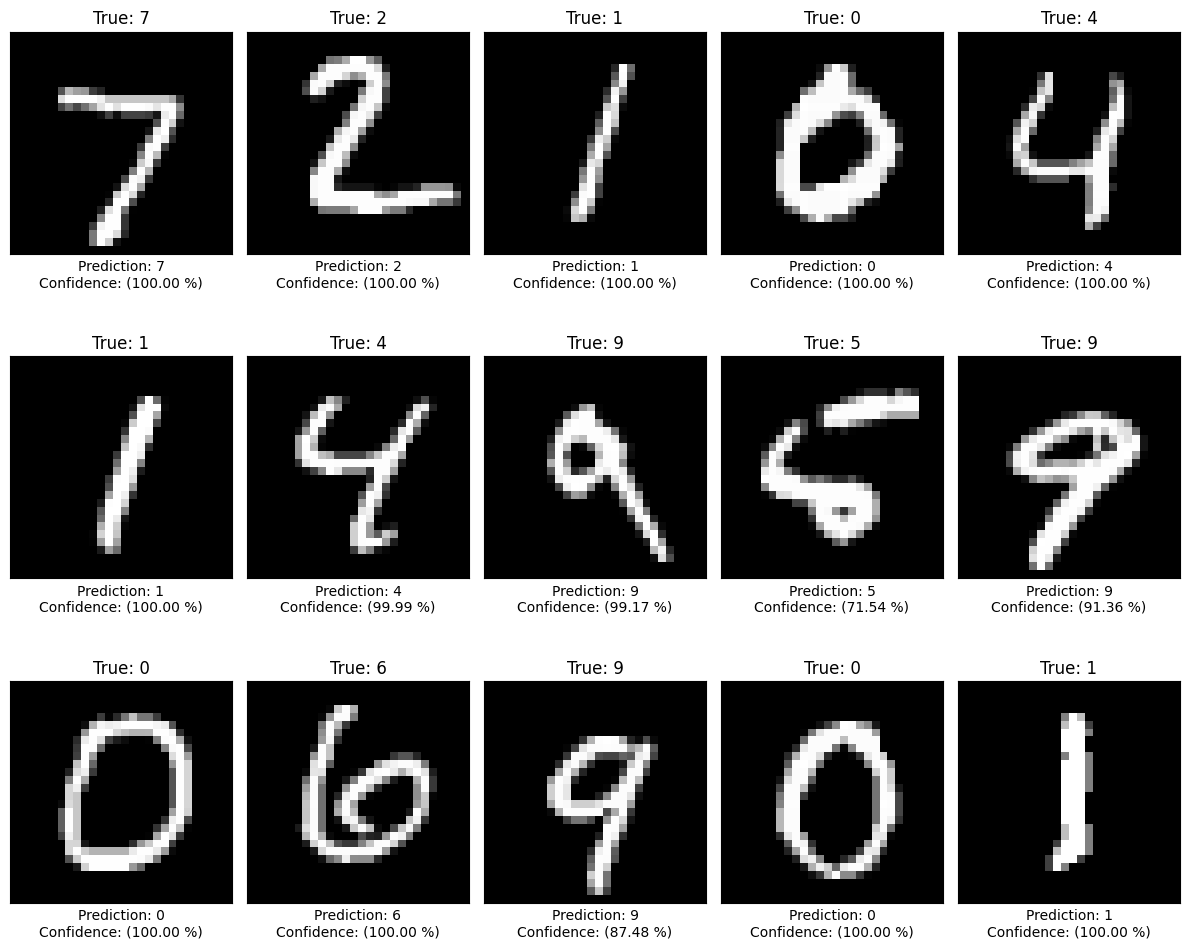

In [ ]:
# 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence=x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes=plt.subplots(3,5)
fig.set_size_inches(12, 10)
for i in range(15):
  ax=axes[i//5, i%5]
  img, y_true, y_pred, confidence=get_one_result(i)
  #imshow로 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()